### Problem Statement
- ### The goal here is to find the chance of admission of a candidate based on his/her GRE score, TOEFL score, rating of the university in which he/she is trying to get admission,strength of the SOP,Strength of the letter of the recommendation, CGPA and the research experience


# Data Preprocessing 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from joblib import dump
%matplotlib inline

In [2]:
df=pd.read_csv("Admission_Prediction.csv")  # importing the data set

In [3]:
df.drop('Serial No.', axis=1, inplace=True)


In [4]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [5]:
df_university = df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
4.3,311.285714,103.857143,3.428571,3.428571,8.434286,0.571429,0.428571
15.0,317.000000,110.000000,3.000000,3.000000,8.880000,0.000000,0.000000
16.0,317.000000,110.000000,3.000000,3.000000,8.880000,0.000000,0.000000
17.5,317.833333,104.833333,4.083333,4.083333,8.973333,0.666667,0.500000
20.0,317.000000,110.000000,3.000000,3.000000,8.880000,0.000000,1.000000
29.9,315.333333,106.000000,3.683333,4.066667,8.495000,0.333333,0.500000
36.6,316.000000,107.833333,3.683333,3.483333,7.683333,0.333333,0.500000
46.4,310.500000,105.666667,3.583333,3.566667,8.076667,0.500000,0.500000
47.0,317.000000,110.000000,3.000000,3.000000,8.880000,0.000000,1.000000


In [6]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']
# here we are droping the Chance of Admit and serial no, as they are not going to be used for the features 
# Chance of Admit is the target column which shows the probalility of admission for a candidate.

In [7]:
x.head() # checking the transformed feature column

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,317,110,47.0,3.0,3.0,8.88,0
1,317,110,16.0,3.0,3.0,8.88,0
2,317,110,4.3,3.0,3.0,8.88,0
3,317,110,20.0,3.0,3.0,8.88,0
4,317,110,15.0,3.0,3.0,8.88,0


In [8]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(49, 1)

In [9]:
# to be only used if you want to scale the data,standize the data,if the variation is huge in the dataset
# when we have huge variation in the data set
# i am not changing the data , i am changing the scale only like taking logs, sqrt--not changing the actual meaning of the data set
# variance betweeen the dataset become very low
# machine will understand in better way this data  as having low variance in the data set

from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_lablel=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
scaled_data

array([[ 0.5046682 ,  0.71321961,  0.2973651 , -0.33885875, -0.36556246,
         0.759955  , -0.8304548 ],
       [ 0.5046682 ,  0.71321961, -0.93007399, -0.33885875, -0.36556246,
         0.759955  , -0.8304548 ],
       [ 0.5046682 ,  0.71321961, -1.39333325, -0.33885875, -0.36556246,
         0.759955  , -0.8304548 ],
       [ 0.5046682 ,  0.71321961, -0.77169475, -0.33885875, -0.36556246,
         0.759955  , -0.8304548 ],
       [ 0.5046682 ,  0.71321961, -0.9696688 , -0.33885875, -0.36556246,
         0.759955  , -0.8304548 ],
       [-1.54892975, -1.36288499,  2.35629518, -2.388745  , -2.23145416,
        -1.98779928, -0.8304548 ],
       [-1.80562949, -1.59356328,  1.69506186, -1.36380187, -1.29850831,
        -0.55667726, -0.8304548 ],
       [-1.03553026, -1.59356328,  1.69506186, -2.388745  , -2.23145416,
         0.30199595, -0.8304548 ],
       [-2.06232924, -2.63161559,  1.69506186, -2.388745  , -2.23145416,
        -0.27045286, -0.8304548 ],
       [ 1.4459006 ,  0.7132

In [10]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,..... 

In [11]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [12]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-0.2434400285949736

                   coefficient
GRE Score             0.035205
TOEFL Score           0.002547
University Rating     0.017480
SOP                   0.029151
LOR                   0.382793
CGPA                  0.261578
Research              0.428959
Feature: 0, Score: 0.03520
Feature: 1, Score: 0.00255
Feature: 2, Score: 0.01748
Feature: 3, Score: 0.02915
Feature: 4, Score: 0.38279
Feature: 5, Score: 0.26158
Feature: 6, Score: 0.42896


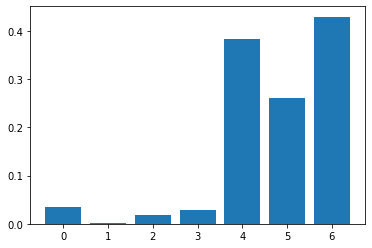

In [13]:
intercept = reg.intercept_
dfx = df.drop('Chance of Admit' , axis=1)
importance = reg.coef_[0]
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [14]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=100)
# finding mi c1 , m2 c2,..... 

In [15]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [16]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-1.7861401571270124

# ANN Model

In [17]:
import tensorflow as tf
from tensorflow import keras
#tf.keras.layers.Dense
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
#opt = keras.optimizers.Adam(learning_rate=0.01)


In [18]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [19]:
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
epochs_hist = ANN_model.fit(train_x, train_y, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
2/2 [==============================] - 1s 271ms/step - loss: 2273.6042 - val_loss: 170.1236
Epoch 2/100
2/2 [==============================] - 0s 41ms/step - loss: 1125.3259 - val_loss: 59.7124
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 1173.7336 - val_loss: 40.3463
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 1071.0433 - val_loss: 71.6889
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 723.9583 - val_loss: 43.7827
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 606.9637 - val_loss: 47.8499
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 592.9833 - val_loss: 66.2216
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 451.7481 - val_loss: 56.7040
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 394.9084 - val_loss: 23.5132
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 312.9081 - v

In [21]:
result = ANN_model.evaluate(test_x, test_y)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

1/1 [==============================] - 0s 17ms/step - loss: 1.0777
Accuracy : -0.0777050256729126


In [22]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

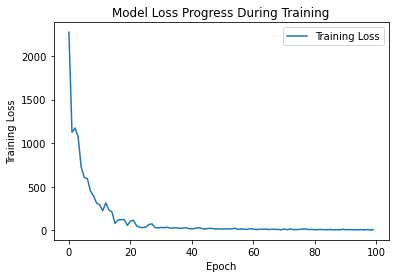

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# Decesion Tree Model

In [24]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.


from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(train_x, train_y)

DecisionTreeRegressor()

                   coefficient
GRE Score             0.158730
TOEFL Score           0.000000
University Rating     0.171958
SOP                   0.583333
LOR                   0.000000
CGPA                  0.085979
Research              0.000000
Feature: 0, Score: 0.15873
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.17196
Feature: 3, Score: 0.58333
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.08598
Feature: 6, Score: 0.00000


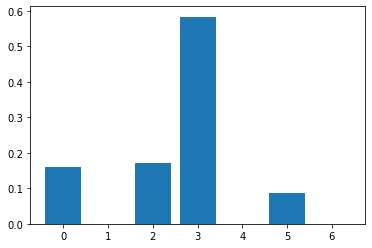

In [25]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = decisionTree_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [26]:
accuracy_decisionTree = decisionTree_model.score(test_x, test_y)
accuracy_decisionTree

-0.6666666666666665

# Random Forrest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(train_x, train_y)
accuracy_randomforest = randomForest_model.score(test_x, test_y)
accuracy_randomforest

C:\Users\mrhus\AppData\Local\Temp/ipykernel_14320/2085754441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(train_x, train_y)


-0.3627500000000017

                   coefficient
GRE Score             0.410505
TOEFL Score           0.027425
University Rating     0.123003
SOP                   0.289187
LOR                   0.108846
CGPA                  0.029550
Research              0.011484
Feature: 0, Score: 0.41050
Feature: 1, Score: 0.02742
Feature: 2, Score: 0.12300
Feature: 3, Score: 0.28919
Feature: 4, Score: 0.10885
Feature: 5, Score: 0.02955
Feature: 6, Score: 0.01148


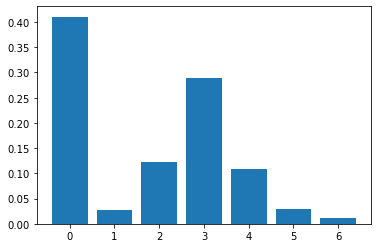

In [28]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = randomForest_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Saving the model to the local file system

In [29]:
#filename='finalized_model.pickle'
#pickle.dump(reg,open(filename,'wb'))
dump(randomForest_model, 'filename.joblib')

['filename.joblib']